In [1]:
import numpy as np
import pandas as pd
import requests

In [2]:
df = pd.read_csv("earthquake3.csv")
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [4]:
df = df.drop('id',axis=1)

In [5]:
df.head()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [6]:
df.tail()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
24002,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [7]:
df.columns

Index(['date', 'time', 'lat', 'long', 'country', 'city', 'area', 'direction',
       'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

In [8]:
df.sample(5)

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
23806,2017.07.22,12:25:47 AM,36.58,26.79,mediterranean,NaN,NaN,NaN,NaN,137.2,4.5,0.0,4.5,4.5,0.0,0.0
9318,1995.02.27,12:04:57 AM,36.89,28.86,turkey,mugla,pinar_koycegiz,south_east,6.3,8.0,3.7,3.7,0.0,NaN,0.0,0.0
5940,1992.10.08,12:27:55 AM,38.74,38.50,turkey,elazig,kumlutarla_baskil,north,2.6,10.0,4.0,0.0,0.0,NaN,0.0,4.0
3205,2017.01.15,12:16:36 AM,39.54,26.11,turkey,canakkale,gulpinar_ayvacik,north_west,1.6,9.9,3.7,0.0,3.5,3.7,0.0,0.0
15794,1988.02.13,12:39:09 AM,35.99,23.40,greece,NaN,NaN,NaN,NaN,22.0,4.1,0.0,3.6,NaN,0.0,4.1


In [9]:
df.shape

(24007, 16)

In [10]:
df.dtypes

date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [11]:
df.describe()

,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [12]:
df.describe(include='object')

,date,time,country,city,area,direction
count,24007,24007,24007,11754,12977,10062
unique,12218,3594,26,93,5321,8
top,2011.10.23,12:00:01 AM,turkey,mugla,girit_adasi,north_west
freq,78,27,11850,1095,452,2019


In [13]:
df['time']

0        12:17:44 AM
1        12:03:08 AM
2        12:41:37 AM
3        12:31:45 AM
4        12:57:38 AM
            ...     
24002    12:23:42 AM
24003    12:42:44 AM
24004    12:08:11 AM
24005    12:35:09 AM
24006    12:25:25 AM
Name: time, Length: 24007, dtype: object

In [14]:
df.nunique()

date         12218
time          3594
lat           1189
long          2539
country         26
city            93
area          5321
direction        8
dist           261
depth          812
xm              44
md              46
richter         44
mw              46
ms              50
mb              48
dtype: int64

In [15]:
df['city'].value_counts().head(5)

mugla        1095
van           900
izmir         700
kutahya       687
canakkale     525
Name: city, dtype: int64

In [16]:
#for selecting the multiple columns and printing it
numeric_data=df[['long','dist','depth']].head(5)
numeric_data

,long,dist,depth
0,40.38,0.1,10.0
1,30.09,0.1,5.2
2,27.61,0.1,0.0
3,36.44,0.1,10.0
4,30.24,0.1,7.0


In [17]:
#for selecting specific rows and columns
#DataFrameName.loc[from_this_row:to_this_row,['column1','column2']]
df.loc[3:6,['dist','long']]

,dist,long
3,0.1,36.44
4,0.1,30.24
5,0.1,27.75
6,0.1,43.61


In [18]:
#for selection the single cell from a specific row and column
df.loc[100,'lat']

39.88

In [19]:
#for selecting a row values of a specified row
df.loc[100,:]

date            2004.02.07
time           12:53:16 AM
lat                  39.88
long                 29.21
country             turkey
city                 bursa
area         alpagut_keles
direction             west
dist                   0.3
depth                  8.0
xm                     3.5
md                     0.0
richter                3.5
mw                     NaN
ms                     0.0
mb                     0.0
Name: 100, dtype: object

In [20]:
#for selecting all column values of a specific columns
df.loc[:,'lat'].head(5)

0    39.04
1    40.79
2    38.58
3    39.47
4    40.80
Name: lat, dtype: float64

In [21]:
#false means the value is present and true means it has null value
df['dist'].isna().sample(5)

10414    True
17475    True
12043    True
15451    True
10430    True
Name: dist, dtype: bool

In [22]:
#get all the columns that has more than 66% null values
df.loc[:,df.isna().sum() > 0.60 * df.shape[0]].columns

Index(['mw'], dtype='object')

In [23]:

# Combine "Date(YYYY/MM/DD)" and "Time(UTC)" into a single column and convert to datetime
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Drop the original "Date(YYYY/MM/DD)" and "Time(UTC)" columns
df = df.drop(["date", "time"], axis=1)

# Reorder columns to have "DateTime" as the first column
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]

display(df)

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003-05-20 00:17:44,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007-08-01 00:03:08,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978-05-07 00:41:37,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997-03-22 00:31:45,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000-04-02 00:57:38,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2017-03-10 00:23:42,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2017-03-10 00:42:44,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2017-04-05 00:08:11,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2017-04-05 00:35:09,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


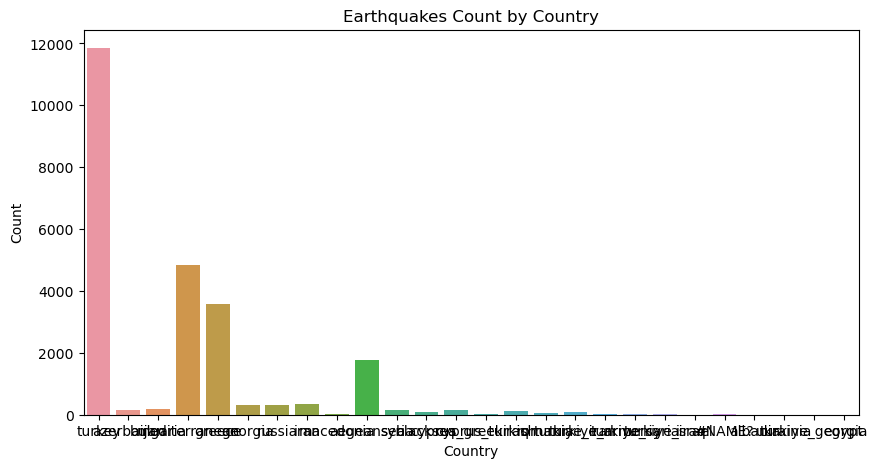

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Categorical data - Bar chart
plt.figure(figsize=(10,5))
sns.countplot(x='country', data=df)
plt.title('Earthquakes Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

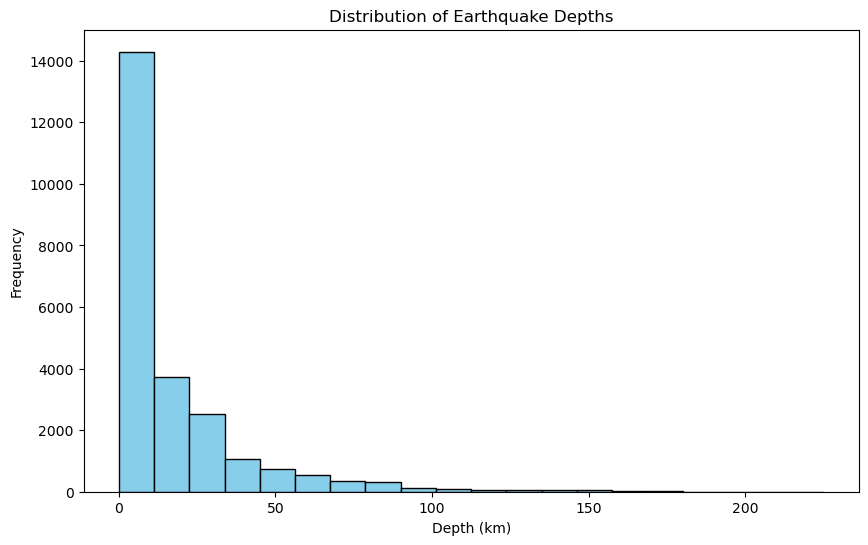

In [26]:
# Depth Analysis - Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['depth'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

In [27]:
df.dtypes

DateTime     datetime64[ns]
lat                 float64
long                float64
country              object
city                 object
area                 object
direction            object
dist                float64
depth               float64
xm                  float64
md                  float64
richter             float64
mw                  float64
ms                  float64
mb                  float64
dtype: object

In [28]:
# Convert the "DateTime" column to float
df['DateTime'] = df['DateTime'].apply(lambda x: x.timestamp())

# Display the DataFrame
display(df)

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,1.053390e+09,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,1.185927e+09,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,2.633497e+08,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,8.589907e+08,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,9.546371e+08,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,1.489105e+09,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,1.489107e+09,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,1.491351e+09,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,1.491353e+09,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [29]:
df.dtypes

DateTime     float64
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [31]:
from sklearn import preprocessing
# Data Encoding
label_encoder = preprocessing.LabelEncoder() 
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

DateTime     float64
lat          float64
long         float64
country        int32
city           int32
area           int32
direction      int32
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [32]:
df.isnull().sum()

DateTime         0
lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

In [34]:
from sklearn.impute import SimpleImputer
# Imputing Missing Values with Mean
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(df[["dist","mw"]])
df[["dist","mw"]] = si.transform(df[["dist","mw"]])
df.isnull().sum()

DateTime     0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64

In [35]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

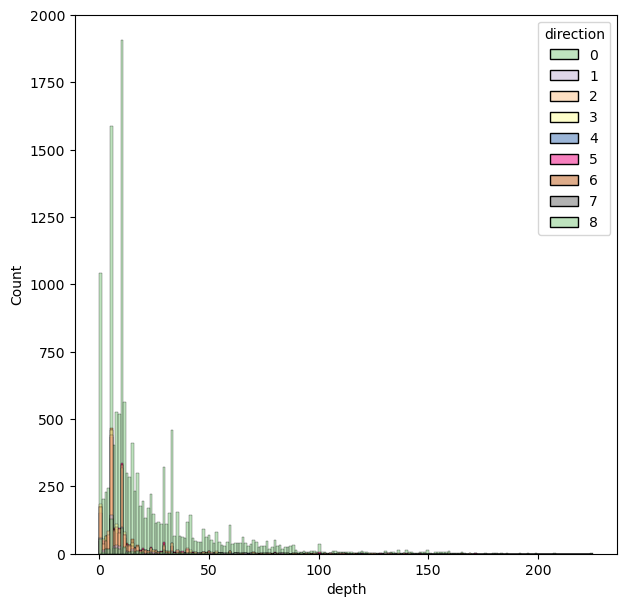

In [36]:

plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

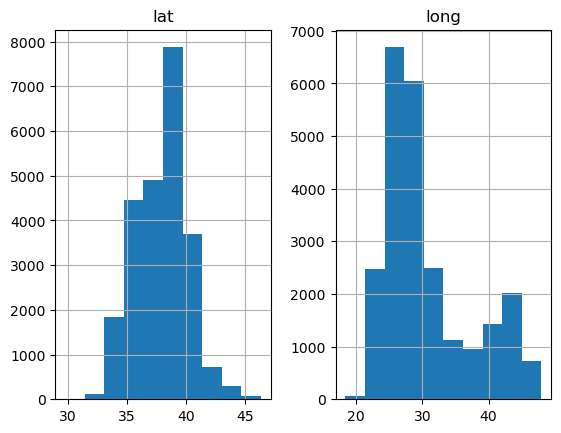

In [37]:

plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_12664\1113540131.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

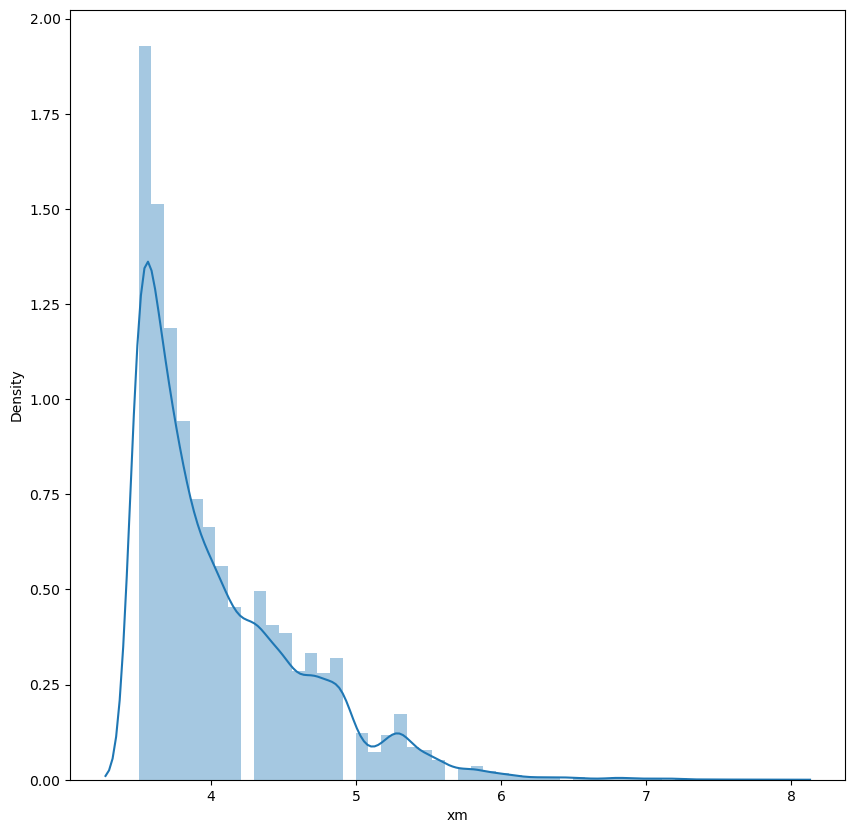

In [38]:

     
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

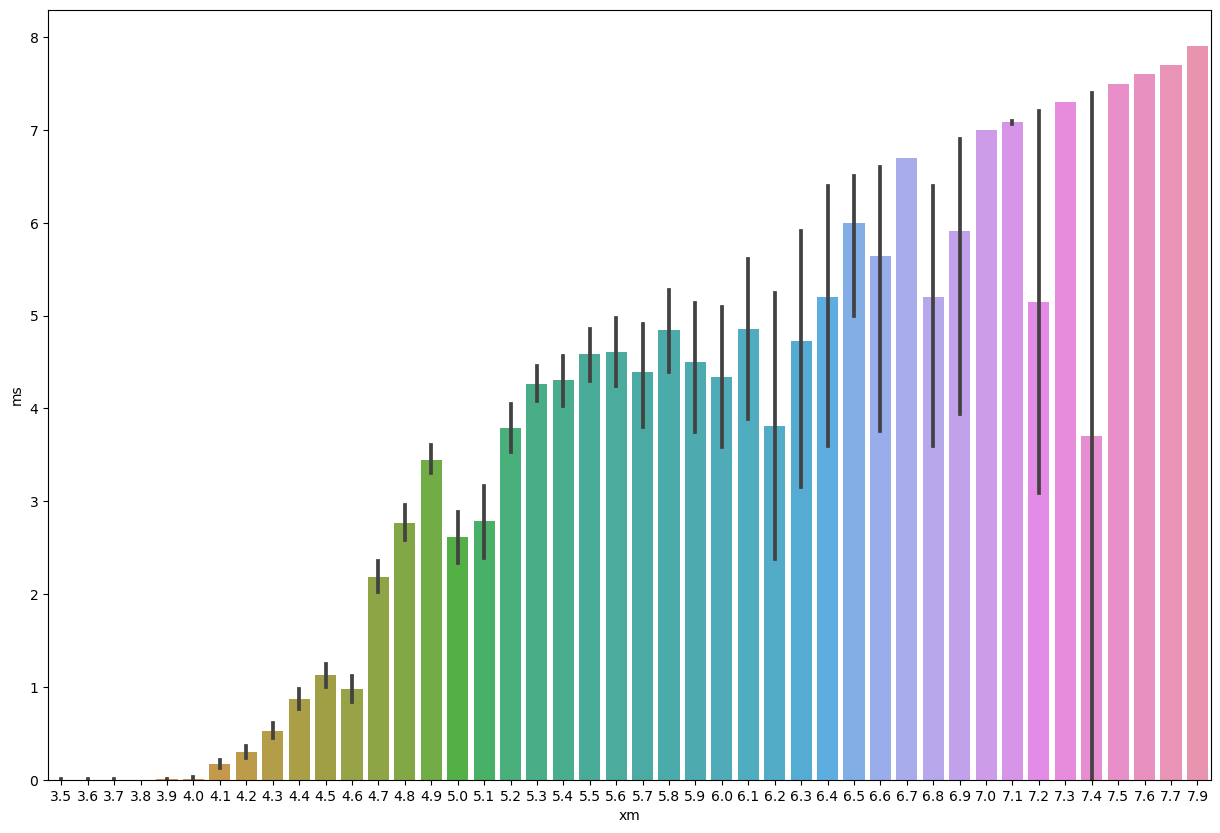

In [39]:

plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

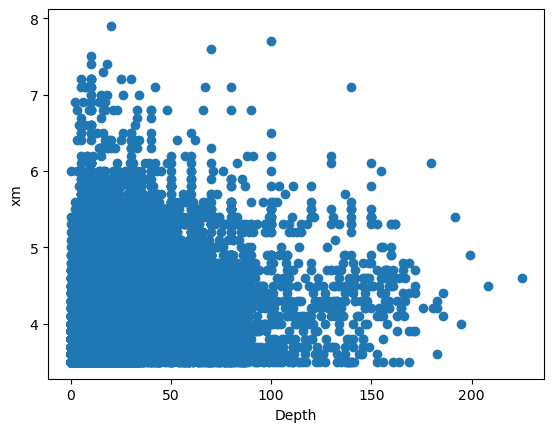

In [40]:

plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

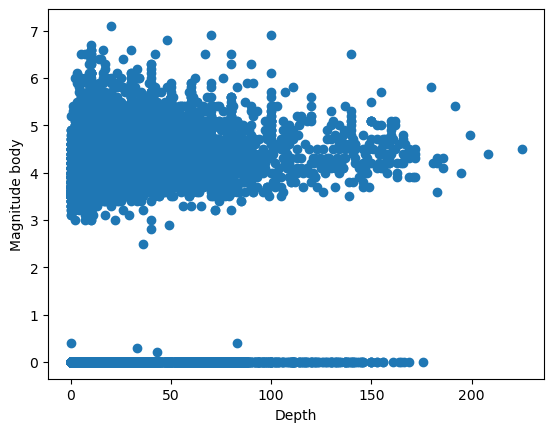

In [41]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

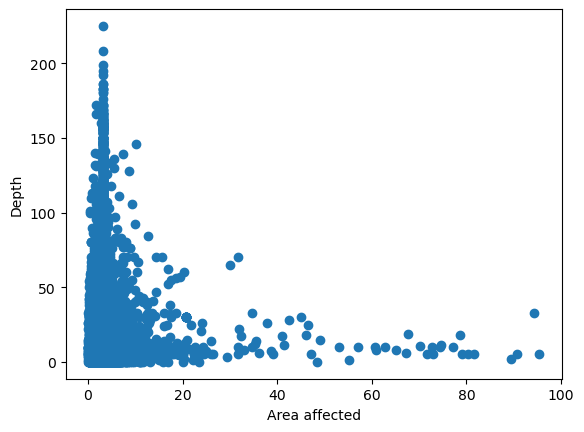

In [42]:

plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

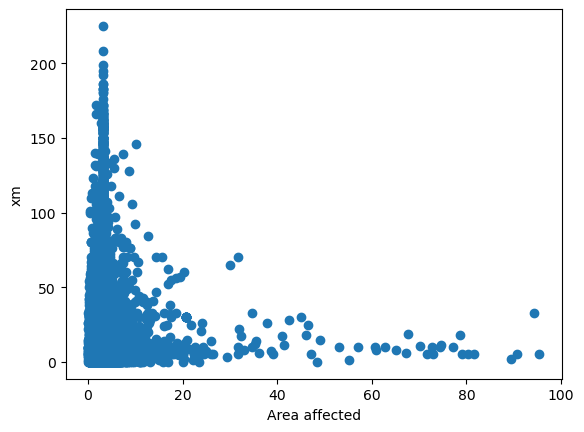

In [43]:

plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

In [44]:

most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
mw           0.420695
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
dist         0.002853
lat         -0.010347
country     -0.056115
DateTime    -0.542092
Name: xm, dtype: float64

In [46]:
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()
     

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.866875,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.906252,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.632149,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.809118,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.837535,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000


splitting the data into x and y

In [47]:
y=np.array(df['xm']) 
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2) 

Random forest regression model

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy1 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {accuracy1:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R^2: 0.9954
MSE: 0.0001
RMSE: 0.0089
MAE: 0.0007


Linear Regression model

In [50]:
import time
from sklearn.linear_model import LinearRegression 
start1 = time.time() 
linear=LinearRegression() 
linear.fit(X_train,y_train) 
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [51]:
accuracy2=linear.score(X_test,y_test) 
print("Accuracy of Linear Regression model is:",accuracy2)

Accuracy of Linear Regression model is: 0.63134131503029


In [52]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.05878246463205688
Mean Squared Error: 0.00625827169726636
Root Mean Squared Error: 0.07910923901331854


Grpah of Actual value and the predicted value

Text(0, 0.5, 'Predicted Magnitude')

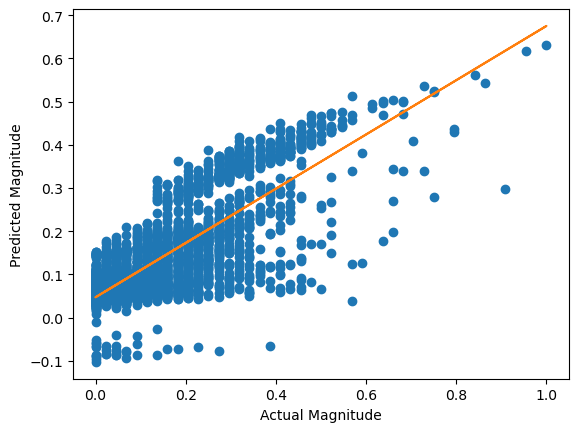

In [53]:
plt.plot(y_test, ans1, 'o') 
m, b = np.polyfit(y_test,ans1, 1) 
plt.plot(y_test, m*y_test + b) 
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

Support Vector Regression

In [54]:
from sklearn.svm import SVR
# Create a Support Vector Regression model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
accuracy3 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {accuracy3:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 0.0029
R-squared: 0.8283
Mean Absolute Error: 0.0468
Root Mean Squared Error: 0.0540


Decision tree Regression

In [55]:

from sklearn.tree import DecisionTreeRegressor
start2 = time.time() 
regressor = DecisionTreeRegressor(random_state = 40) 
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2

In [56]:

accuracy4=regressor.score(X_test,y_test) 
print("Accuracy of Decision Tree model is:",accuracy4)

Accuracy of Decision Tree model is: 0.9944683232855328


KNN model

In [57]:

from sklearn.neighbors import KNeighborsRegressor
start3 = time.time() 
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3

In [69]:
accuracy5=knn.score(X_test,y_test) 
print("Accuracy of KNN model is:",accuracy5)

Accuracy of KNN model is: 0.8457466919393031


In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, ans3))
print('MSE:', metrics.mean_squared_error(y_test, ans3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))
     

MAE: 0.03305598677318794
MSE: 0.002618571462992348
RMSE: 0.051171979275696854


Gradient Boosting Regressor model

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
accuracy6 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"MSE: {mse:.4f}")
print(f"R^2: {accuracy6:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MSE: 0.0002
R^2: 0.9898
MAE: 0.0063
RMSE: 0.0132


In [61]:
models = ["random forest","linear regression","support vector","decision tree","knn","Gradient boosting"]
accuracies = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6]

Text(0.5, 1.0, 'Accuracy Comparison Graph of different model for predicting the earthquake prediction')

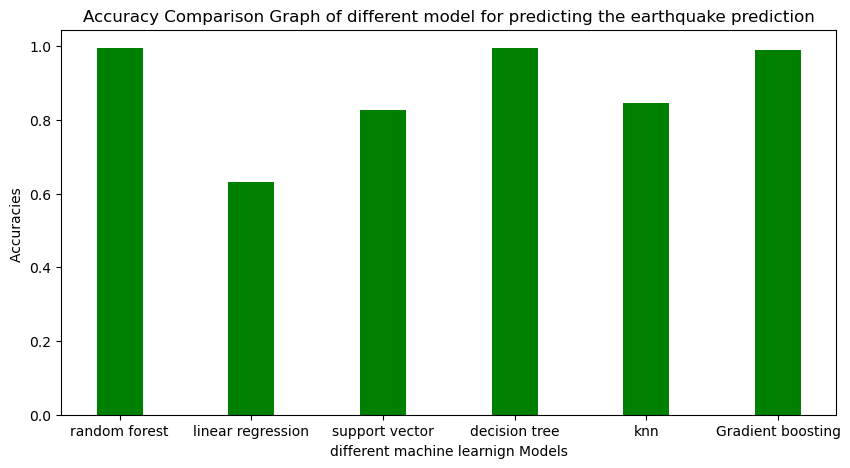

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color ='green',width = 0.35)
plt.xlabel("different machine learnign Models")
plt.ylabel("Accuracies ")
plt.title("Accuracy Comparison Graph of different model for predicting the earthquake prediction")